# Chapter 11-12: Clustering

โค้ดตัวอย่างการสร้างโมเดลประเภทการเรียนรู้แบบมีไม่มีผู้สอน (Unsupervised Learning) อย่างเช่น เทคนิค K-Means Clustering  เทคนิค Gaussian Mixture Model (GMM)  เทคนิค DBSCAN  และเทคนิค Agglomerative Hierarchical Clustering 

ตัวอย่างนี้ใช้ชุดข้อมูลสังเคราะห์ที่สร้างด้วยไลบรารี่ [`scikit-learn`](https://scikit-learn.org/stable/datasets/sample_generators.html) และโค้ดถูกเขียนโดยใช้ไลบรารี่ [`scikit-learn`](https://scikit-learn.org/) เช่นเดียวกัน

**Reference**: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### ขั้นตอน
1. Import Package and Module
2. Create Dataset
3. Train Unsupervised Learning Model
4. Discussion

## 1. Import Package and Module

ทำการนำเข้าแพ็กเกจและโมดูลที่จำเป็นต้องใช้อย่าง scikit-learn (sklearn) ส่วน Matplotlib ใช้สำหรับแสดงผล

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

## 2. Create Dataset

ทำการสร้างชุดข้อมูลสังเคราะห์ 6 ชุดด้วยกัน คือ
* Donut: เป็นรูปโดนัท ซึ่งเป็นข้อมูล Non-Convex 
* Moons: เป็นรูปพระจันทร์ ซึ่งเป็นข้อมูล Non-Convex 
* Varied: เป็น blob ที่มีการกระจายตัว (Variance) ต่างกัน
* Aniso: เป็น blob ที่ความยาวต่างกัน (Anisotropicly distributed data)
* Blobs: หรือ กลุ่มของจุด
* No Structures: จดกระจายตัวแบบ Uniform

In [2]:
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

data = [noisy_circles,
        noisy_moons,
        varied,
        aniso, 
        blobs, 
        no_structure]

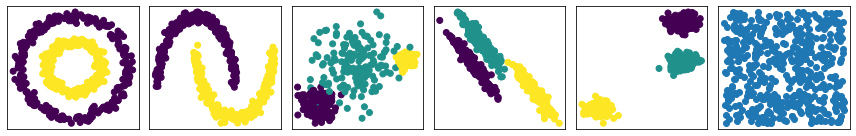

In [3]:
plt.figure(figsize=(12,2))
for i_dataset, dataset in enumerate(data):
    plt.subplot(1,6,i_dataset+1)
    plt.scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

## 3. Train Unsupervised Learning model

สร้างโมเดลด้วยเทคนิค K-Means Clustering ([`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) เทคนิค Gaussian Mixture Model (GMM) ([`GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)) เทคนิค DBSCAN ([`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)) และเทคนิค Agglomerative Hierarchical Clustering ([`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)) ตามลำดับ โดยแต่ละเทคนิคก็จะมี Hyperparameter ที่ต่างกันไป

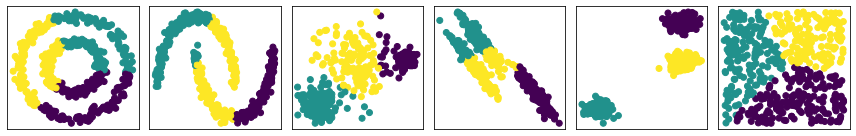

In [4]:
#@title K-Mean
n_clusters = 3 #@param {type:"slider", min:2, max:5, step:1}

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = cluster.KMeans(n_clusters=n_clusters, n_init="auto").fit(X)
    y_pred = algo.predict(X)
    
    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

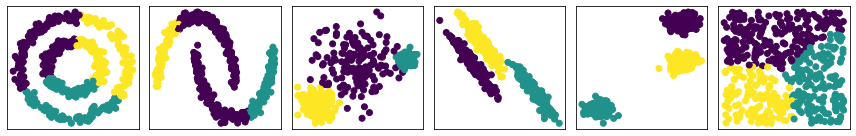

In [5]:
#@title GMM
n_clusters = 3 #@param {type:"slider", min:2, max:5, step:1}

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = mixture.GaussianMixture(
            n_components=n_clusters, covariance_type="full"
        ).fit(X)
    y_pred = algo.predict(X)
    
    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

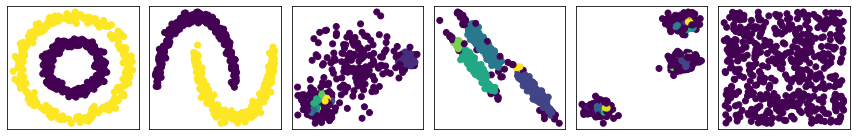

In [6]:
#@title DBSCAN
eps = 0.25 #@param {type:"slider", min:0.05, max:1, step:0.05}

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = algo = cluster.DBSCAN(eps=eps).fit(X)
    y_pred = algo.labels_.astype(int)
    
    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

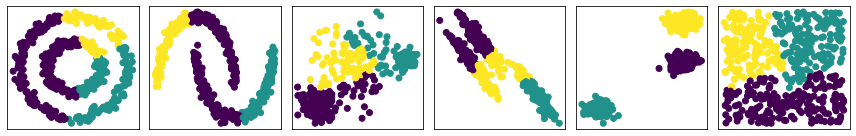

In [7]:
#@title Agglomerative Clustering
n_clusters = 3 #@param {type:"slider", min:2, max:5, step:1}
linkage = 'complete' #@param ["ward", "complete", "average", "single"]

plt.figure(figsize=(12,2))
for i_dataset, (X, y) in enumerate(data):
    algo = cluster.AgglomerativeClustering(
            linkage=linkage,
            n_clusters=n_clusters,
        ).fit(X)
    y_pred = algo.labels_.astype(int)
    
    plt.subplot(1,6,i_dataset+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

## 4. Discussion

จะเห็นได้ว่าเทคนิคอย่าง K-Mean และ GMM จะทำงานได้ดีเมื่อข้อมูลเป็น Convex อีกทั้งเทคนิคประเภท Representative-Based จะสามารถใช้กับข้อมูลใหม่โดยไม่ต้องสร้างโมเดลใหม่ได้ โดยเรียกใช้ฟังก์ชัน `predict` ในขณะที่ DBSCAN อาจจะจัดการข้อมูล Non-Convex ได้ดี แต่เทคนิคนี้อ่อนไหวต่อค่า Hyperparameter อย่าง ϵ ส่วน Agglomerative Clustering ก็ให้ผลลัพธ์ที่แตกต่างกันไปขึ้นอยู่กับวิธีคำนวณความคล้ายระหว่าง Cluster แต่สองเทคนิคหลังจะต้องสร้างโมเดลใหม่ทุกครั้งที่มีการอัพเดทข้อมูล

----